<a href="https://colab.research.google.com/github/sravyamullapudi26/code_alpha_data_SCience/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib


In [ ]:
# Load the dataset
df = pd.read_csv('/content/car data.csv')

# Display the first few rows
print("Dataset Preview:")
print(df.head())


Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
X = df.drop('Selling_Price', axis=1)  # Drop the target column
y = df['Selling_Price']  # Target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression
print("\nLinear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))



Linear Regression Results:
R2 Score: 0.5997023481244084
Mean Absolute Error: 2.03651747910738


In [ ]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regressor
print("\nRandom Forest Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))



Random Forest Results:
R2 Score: 0.9673373873539192
Mean Absolute Error: 0.5907950819672131


In [ ]:
# Save the Random Forest model
joblib.dump(rf_model, 'car_price_model.pkl')
print("\nModel saved as 'car_price_model.pkl'")



Model saved as 'car_price_model.pkl'


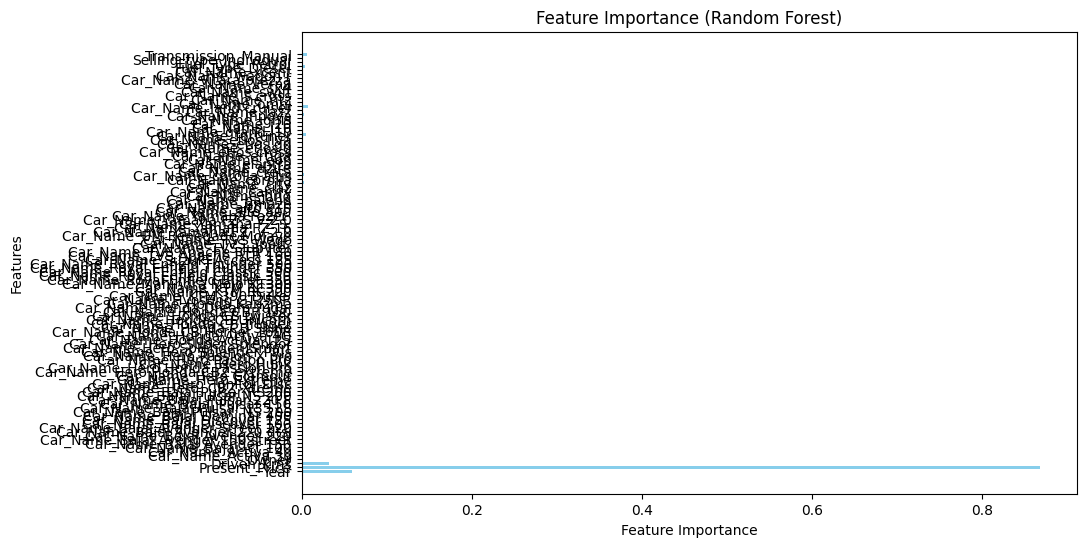

In [ ]:
# Plot Feature Importance for Random Forest
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()
